Applying Image Registration Techniques using warpAffine() method for performing operations of Translation, Rotation, Scaling, Shearing & Reflection of i/p image

Enter the image path: C:\Users\Laptop\Downloads\image_registration_dataset\image_registration_dataset\eiffel_base.jpg

Image Registration Techniques:
1. Translation
2. Rotation
3. Scaling
4. Shearing
5. Reflection
6. Exit
Enter your choice (1-6): 1
Enter translation along x-axis (positive or negative): 10
Enter translation along y-axis (positive or negative): 10


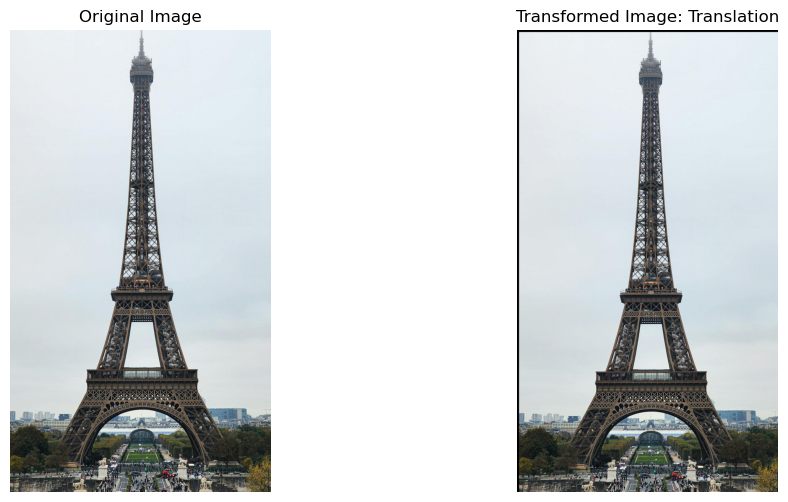


Image Registration Techniques:
1. Translation
2. Rotation
3. Scaling
4. Shearing
5. Reflection
6. Exit
Enter your choice (1-6): 2
Enter rotation angle in degrees: 45
Enter scaling factor (default 1.0): 0.5


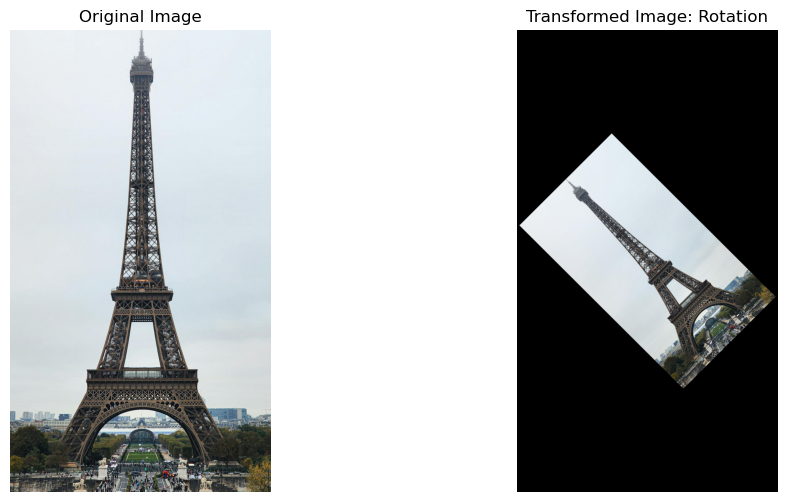


Image Registration Techniques:
1. Translation
2. Rotation
3. Scaling
4. Shearing
5. Reflection
6. Exit
Enter your choice (1-6): 3
Enter scaling factor for x-axis: 1
Enter scaling factor for y-axis: 1


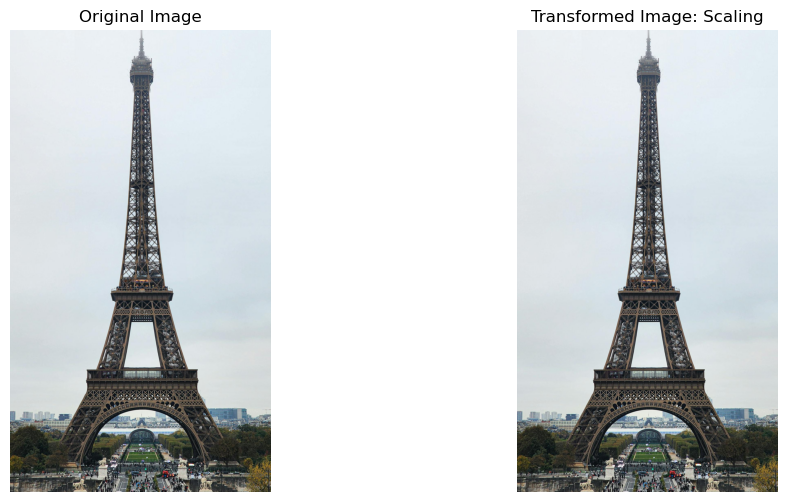


Image Registration Techniques:
1. Translation
2. Rotation
3. Scaling
4. Shearing
5. Reflection
6. Exit
Enter your choice (1-6): 3
Enter scaling factor for x-axis: 2
Enter scaling factor for y-axis: 2


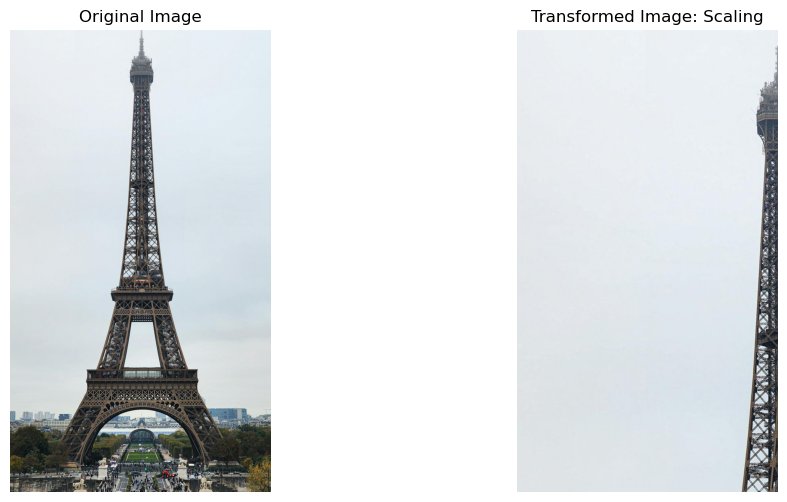


Image Registration Techniques:
1. Translation
2. Rotation
3. Scaling
4. Shearing
5. Reflection
6. Exit
Enter your choice (1-6): 4
Enter shearing factor along x-axis: 0.2
Enter shearing factor along y-axis: 0.2


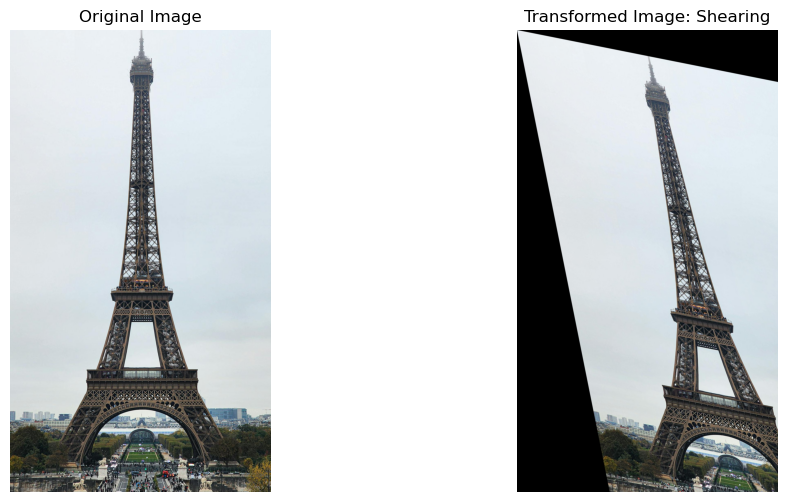


Image Registration Techniques:
1. Translation
2. Rotation
3. Scaling
4. Shearing
5. Reflection
6. Exit
Enter your choice (1-6): 5
Enter reflection axis (0 for x-axis, 1 for y-axis): 0


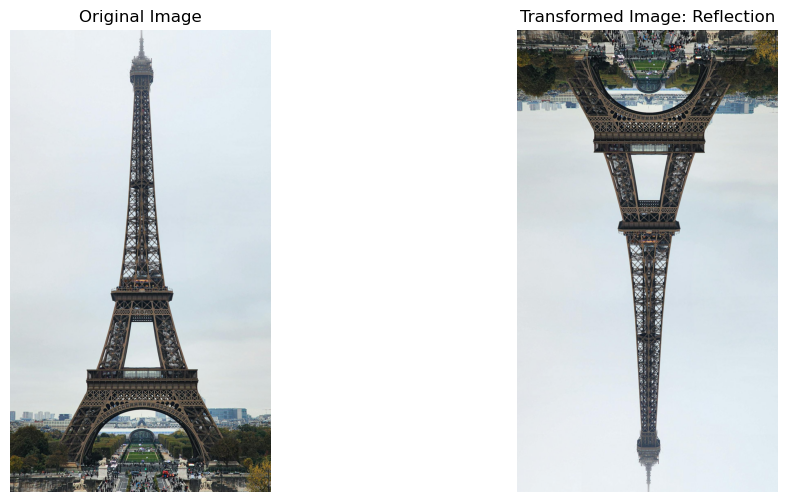


Image Registration Techniques:
1. Translation
2. Rotation
3. Scaling
4. Shearing
5. Reflection
6. Exit
Enter your choice (1-6): 6


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def translate(img, tx, ty):
    
    rows, cols = img.shape[:2]
    translation_mat = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_img = cv2.warpAffine(img, translation_mat, (cols, rows))
    
    return translated_img

def rotate(img, angle, scale=1.0):
    
    rows, cols = img.shape[:2]
    center = (cols // 2, rows // 2)
    rotation_mat = cv2.getRotationMatrix2D(center, angle, scale)
    rotated_img = cv2.warpAffine(img, rotation_mat, (cols, rows))
    
    return rotated_img

def scale(img, sx, sy):
    
    rows, cols = img.shape[:2]
    scaling_mat = np.float32([[sx, 0, 0], [0, sy, 0]])
    scaled_img = cv2.warpAffine(img, scaling_mat, (cols, rows))
    
    return scaled_img

def shear(img, shx, shy):
    
    rows, cols = img.shape[:2]
    shearing_mat = np.float32([[1, shx, 0], [shy, 1, 0]])
    sheared_img = cv2.warpAffine(img, shearing_mat, (cols, rows))
    
    return sheared_img

def reflect(img, axis):
    
    rows, cols = img.shape[:2]
    if axis == 0:
        reflection_mat = np.float32([[1, 0, 0], [0, -1, rows]])
    elif axis == 1:
        reflection_mat = np.float32([[-1, 0, cols], [0, 1, 0]])
    else:
        print("Invalid axis. Use 0 for x-axis and 1 for y-axis.")
        return img
    
    reflected_img = cv2.warpAffine(img, reflection_mat, (cols, rows))
    
    return reflected_img

def plot(original, transformed, title):
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(transformed, cv2.COLOR_BGR2RGB))
    plt.title(f'Transformed Image: {title}')
    plt.axis('off')
    plt.show()

def main():
    
    img_path = input("Enter the image path: ")
    img = cv2.imread(img_path)
    
    if img is None:
        print("Could not read image. Check the path.")
        return
    
    while True:
        print("\nImage Registration Techniques:")
        print("1. Translation")
        print("2. Rotation")
        print("3. Scaling")
        print("4. Shearing")
        print("5. Reflection")
        print("6. Exit")
        
        ch = int(input("Enter your choice (1-6): "))
        
        if ch == 1:
            
            tx = float(input("Enter translation along x-axis (positive or negative): "))
            ty = float(input("Enter translation along y-axis (positive or negative): "))
            
            translated_img = translate(img, tx, ty)
            plot(img, translated_img, "Translation")
            
        elif ch == 2:
            
            angle = float(input("Enter rotation angle in degrees: "))
            scaling_factor = float(input("Enter scaling factor (default 1.0): ") or "1.0")
            
            rotated_img = rotate(img, angle, scaling_factor)
            plot(img, rotated_img, "Rotation")
            
        elif ch == 3:
            
            sx = float(input("Enter scaling factor for x-axis: "))
            sy = float(input("Enter scaling factor for y-axis: "))
            
            scaled_img = scale(img, sx, sy)
            plot(img, scaled_img, "Scaling")
            
        elif ch == 4:
            
            shx = float(input("Enter shearing factor along x-axis: "))
            shy = float(input("Enter shearing factor along y-axis: "))
            
            sheared_img = shear(img, shx, shy)
            plot(img, sheared_img, "Shearing")
            
        elif ch == 5:
            
            axis = int(input("Enter reflection axis (0 for x-axis, 1 for y-axis): "))
            
            reflected_img = reflect(img, axis)
            plot(img, reflected_img, "Reflection")
            
        elif ch == 6:
            break
        
        else:
            print("Invalid choice.")

if __name__ == "__main__":
    main()


In [ ]:
# Image registration aligns two or more images of the same scene taken under different conditions (angles, scales, etc.). 
# It involves geometric transformations like translation, rotation, scaling, shearing, and reflection.

# Applications:
# Medical imaging (aligning CT/MRI scans).
# Remote sensing (satellite images).
# Computer vision (tracking objects).

# Translation: Moves the image to a different location in the plane.
# Rotation: Changes the orientation of the image.
# Scaling: Alters the size of the image.
# Shearing: Skews the image, changing its shape but not its area.
# Reflection: Flips the image across an axis. 



#     Translation (translate function)
# Purpose: Shifts an image along the x and y axes.
# Key Functionality:
# cv2.warpAffine: Applies an affine transformation to the image using a 2x3 transformation matrix.
# The matrix for translation:
# translation_mat=[1 0 𝑡𝑥
#                  0 1 𝑡𝑦]
# tx: Horizontal shift, ty: Vertical shift.

# Effect of Parameters:
# Increasing tx: Moves the image to the right.
# Decreasing tx: Moves the image to the left.
# Increasing ty: Moves the image down.
# Decreasing ty: Moves the image up.
    
 

# rotation
# Purpose: Rotates an image about its center.
# Key Functionality:
# cv2.getRotationMatrix2D: Creates a 2x3 rotation matrix for rotation and optional scaling:
# rotation_mat=[ cos(θ)⋅s  −sin(θ)⋅s  tx
#                sin(θ)⋅s   cos(θ)⋅s  ty  ]

# Where s is the scaling factor, and θ is the rotation angle.
# cv2.warpAffine: Applies the rotation.

# Effect of Parameters:
# Increasing angle: Rotates the image clockwise.
# Decreasing angle: Rotates the image counterclockwise.
# Increasing s: Enlarges the image.
# Decreasing s: Shrinks the image.

    
# 3. Scaling (scale function)
# Purpose: Enlarges or shrinks the image along the x and y axes.
# Key Functionality:
# cv2.warpAffine: Uses a 2x3 scaling matrix:

# scaling_mat=[ sx  0  0
#               0  sy  0 ]

# sx: Scaling factor along the x-axis.
# sy: Scaling factor along the y-axis.

# Effect of Parameters:
# Increasing sx: Stretches the image horizontally.
# Decreasing sx: Compresses the image horizontally.
# Increasing sy: Stretches the image vertically.
# Decreasing sy: Compresses the image vertically.

    
    
# 4. Shearing (shear function)
# Purpose: Skews the image along the x or y axis.
# Key Functionality:
# cv2.warpAffine: Uses a shearing matrix:
# shearing_mat=[ 1   shx  0
#               shy   1   0  ]

# shx: Shearing factor along the x-axis.
# shy: Shearing factor along the y-axis.

# Effect of Parameters:
# Increasing shx: Skews the image more horizontally.
# Increasing shy: Skews the image more vertically.

    
    
# 5. Reflection (reflect function)
# Purpose: Flips the image across the x or y axis.
# Key Functionality:
# cv2.warpAffine: Uses a reflection matrix:
# Reflection about x-axis:
# reflection_mat=[ 1   0   0
#                  0   -1  rows ]

# Reflection about y-axis:
# reflection_mat=[ 1   0   0
#                  0   -1  rows ]
  
# Effect of Parameters:
# axis=0: Reflects the image vertically.
# axis=1: Reflects the image horizontally.


    
# 6. Plotting Functionality (plot function)
# Purpose: Visualizes the original and transformed images side by side.
# Key Functionality:
# Uses matplotlib.pyplot to display images.
# cv2.cvtColor: Converts the image from BGR (used by OpenCV) to RGB (used by Matplotlib) for correct color representation.
    
    
# Q: What does the cv2.warpAffine function do?
# A: It applies an affine transformation to the image using a 2x3 transformation matrix.

# Q: How does the rotation matrix change if you increase the scaling factor?
# A: The image enlarges as the scaling factor multiplies the cosine and sine components of the matrix, increasing the output size.

# Q: What happens if you set shx=0 and shy=0 in shearing?
# A: The image remains unchanged, as no skew is applied.

# Q: What will happen if the translation matrix values tx and ty exceed the image dimensions?
# A: Parts of the image will move outside the frame, resulting in black areas.

# Q: Why do we need cv2.cvtColor when displaying images using Matplotlib?
# A: OpenCV reads images in BGR format, while Matplotlib displays them in RGB format. The conversion ensures correct color representation.